In [1]:
pip install --upgrade sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [18 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  
  If the previous advice does not cover your use case, feel 

In [2]:
import pandas as pd
import pylab as pl
import numpy as np 
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
import re
import inspect
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
titanic_data = pd.read_csv('train.csv')
testing_data = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

In [4]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
titanic_data.shape

(891, 12)

### Data Wrangling


In [6]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Dealing missing values of age


In [7]:
titanic_data['Title'] = titanic_data['Name'].str.extract(' ([A-Za-z]+)\.')
testing_data['Title'] = testing_data['Name'].str.extract(' ([A-Za-z]+)\.')

In [8]:
testing_data['Title']

0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Title, Length: 418, dtype: object

In [9]:
median_age_by_title = titanic_data.groupby('Title')['Age'].median()
for title,age in median_age_by_title.items():
    mask = (titanic_data['Title'] == title) & (titanic_data['Age'].isnull())
    titanic_data.loc[mask, 'Age'] = age
    
    
median_age_by_title_for_test = testing_data.groupby('Title')['Age'].median()
for title,age in median_age_by_title_for_test.items():
    mask = (testing_data['Title'] == title) & (testing_data['Age'].isnull())
    testing_data.loc[mask, 'Age'] = age

In [10]:
print(titanic_data.isnull().sum())
print(testing_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              1
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64


In [11]:
## median for replacing the testing data age where the age is null for 1 row

testing_data['Age'] = testing_data['Age'].replace(np.nan,testing_data['Age'].median())

## mean for replacing the fare amount in the testing data
testing_data['Fare'] = testing_data['Fare'].replace(np.nan,testing_data['Fare'].mean())

### Handling missing Values For Embarked

In [12]:
embarked_mode = titanic_data['Embarked'].mode()[0]
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(embarked_mode)

In [13]:
print(titanic_data.isnull().sum())
print(testing_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64


## Drop the unnecessary Columns from above 

Such as passengerid,name,ticket and cabin


In [14]:
titanic_data = titanic_data[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,21.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


Same for testing data

In [15]:
testing_data = testing_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
testing_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,28.5,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,28.5,0,0,8.0500,S


## Converting labeled data into Numerical data


In [16]:
labeling = LabelEncoder()

In [17]:
titanic_data['Sex'] = labeling.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = labeling.fit_transform(titanic_data['Embarked'])
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,21.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


Same do for the testing data

In [18]:
testing_data['Sex'] = labeling.fit_transform(testing_data['Sex'])
testing_data['Embarked'] = labeling.fit_transform(testing_data['Embarked'])
testing_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,28.5,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,28.5,0,0,8.0500,2


## Exploratory Data Analysis

In [19]:
women = titanic_data.loc[titanic_data.Sex == 0]['Survived']
rate_women = sum(women)/len(women)*100

print("% of women who survived:", rate_women)

% of women who survived: 74.20382165605095


In [20]:
men = titanic_data.loc[titanic_data.Sex == 1]["Survived"]
rate_men = sum(men)/len(men)*100

print("% of men who survived:", rate_men)

% of men who survived: 18.890814558058924


In [21]:
kids = titanic_data.loc[titanic_data.Age <= 17]["Survived"]
rate_kids = sum(kids)/len(kids)*100

print("% of kids who survived:", rate_kids)

% of kids who survived: 53.84615384615385


In [22]:
adults = titanic_data.loc[(titanic_data.Age >= 18) & (titanic_data.Age <= 65)]["Survived"]
rate_adults = sum(adults)/len(adults)*100

print("% of adults who survived:", rate_adults)

% of adults who survived: 36.29242819843342


In [23]:
seniors = titanic_data.loc[titanic_data.Age >= 66]["Survived"]
rate_seniors = (sum(seniors)/len(seniors))*100

print("% of seniors who survived:", rate_seniors)

% of seniors who survived: 12.5


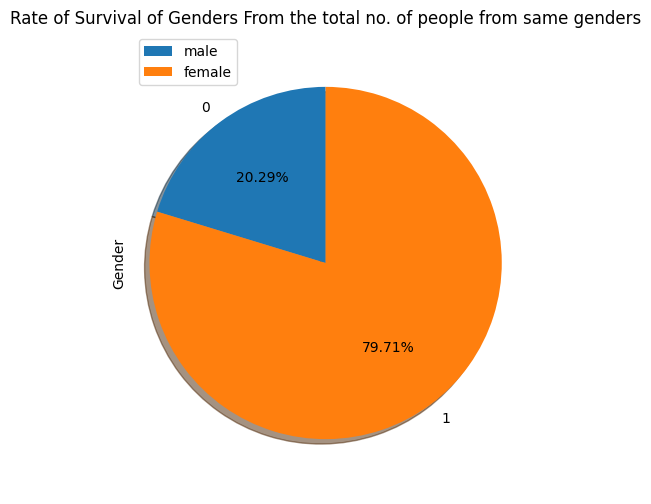

,Gender
0,18.890815
1,74.203822


In [24]:
labels1=['male','female']
rateofsurvival_gender=[rate_men,rate_women]
rateofsurvival_gender=pd.DataFrame(rateofsurvival_gender)
rateofsurvival_gender.rename(columns = {0:'Gender'}, inplace = True)
rateofsurvival_gender['Gender'].plot(kind='pie',figsize=(5,6),autopct='%.2f%%',startangle=90,shadow=True)
plt.title('Rate of Survival of Genders From the total no. of people from same genders')
plt.axis('equal')
plt.legend(labels=labels1,loc='upper left')
plt.show()
rateofsurvival_gender

In [25]:
titanic_data['Sex'].value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

In [26]:
titanic_data.corr(method='pearson',numeric_only=True)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.078816,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.354005,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.104820,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.078816,-0.354005,0.104820,1.000000,-0.265602,-0.188122,0.097944,-0.018319
SibSp,-0.035322,0.083081,-0.114631,-0.265602,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.188122,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.097944,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.018319,0.068230,0.039798,-0.224719,1.000000


Sex
0    233
1    109
Name: Survived, dtype: int64


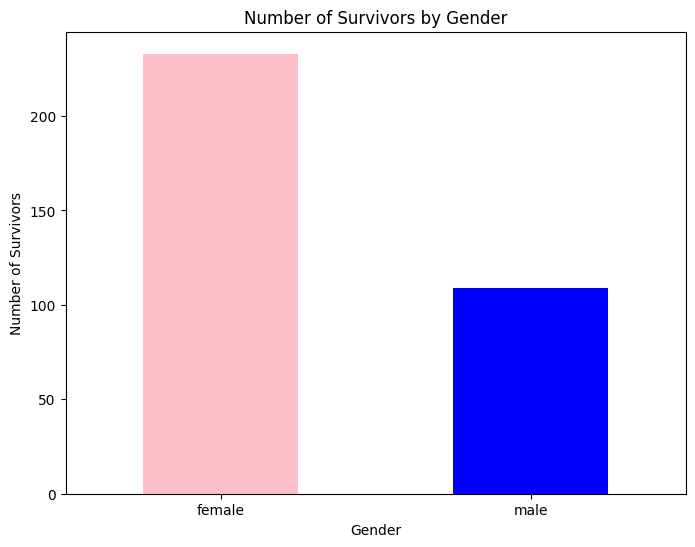

In [27]:
labels=[1,0]
new_labels = ['male', 'female']
survival_counts = titanic_data.groupby('Sex')['Survived'].sum()
print(survival_counts)
# Create a bar graph
plt.figure(figsize=(8, 6))
survival_counts.plot(kind='bar', color=['pink', 'blue'])
plt.title('Number of Survivors by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Survivors')
plt.xticks(labels,new_labels,rotation=0)  # Rotate x-axis labels for better readability
plt.show()

Text(0.5, 1.0, 'Rate of Survivors By Gender')

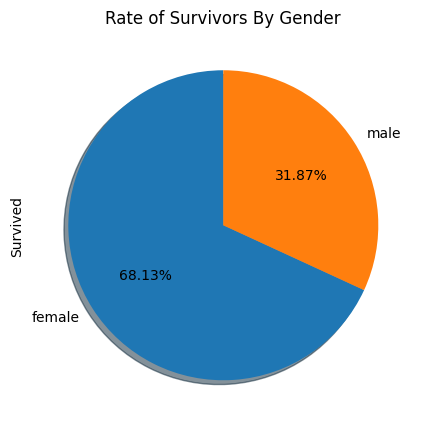

In [28]:
survival_counts.plot(kind='pie',figsize=(5,6),autopct='%.2f%%',startangle=90,shadow=True,labels=['female','male'])
plt.title('Rate of Survivors By Gender')

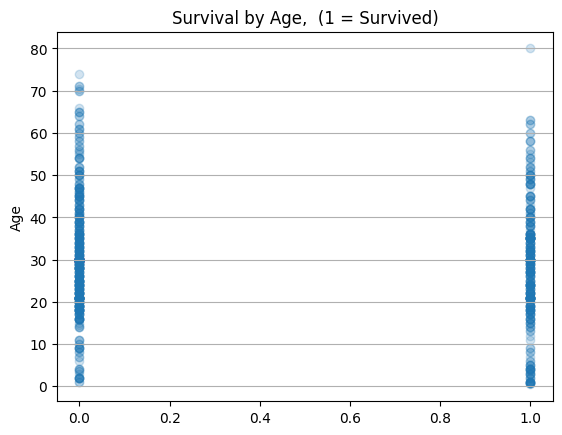

In [29]:
plt.scatter(titanic_data.Survived, titanic_data.Age, alpha=0.2)
# sets the y axis lable
plt.ylabel("Age")
plt.grid(True, which='major', axis='y')
# formats the grid line style of our graphs                           
plt.title("Survival by Age,  (1 = Survived)")
plt.show()

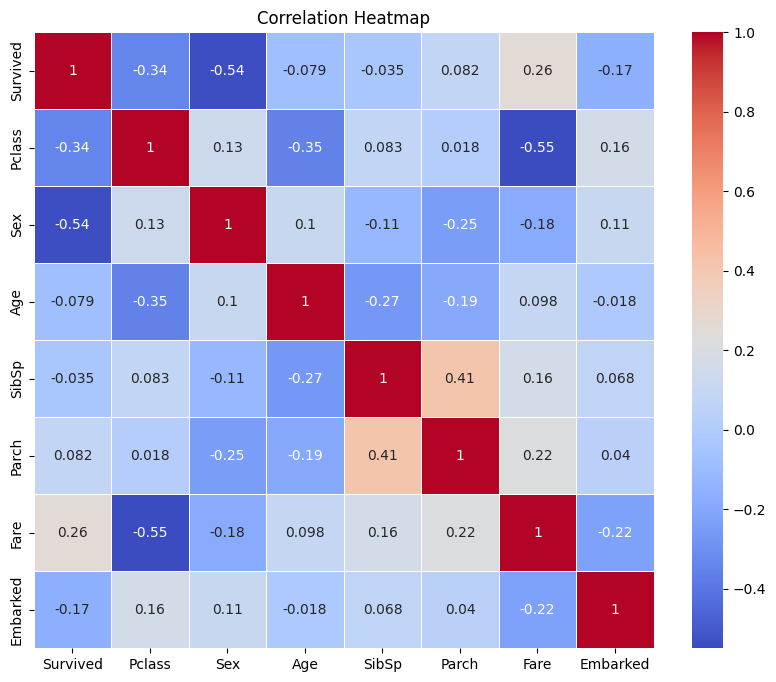

Text(0.5, 1.0, 'Passengers per boarding location')

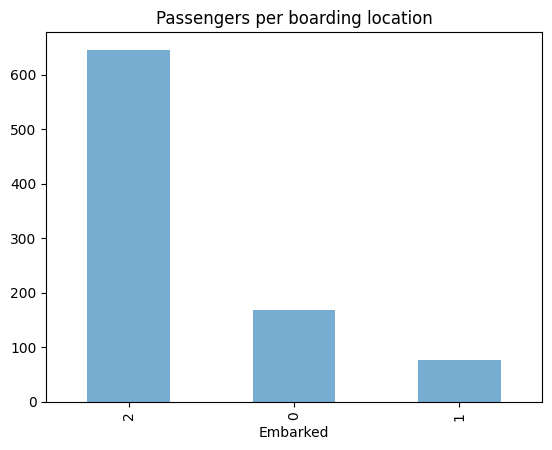

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(titanic_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

titanic_data.Embarked.value_counts().plot(kind='bar', alpha=0.6)
# specifies the parameters of our graphs
plt.title("Passengers per boarding location")

## Machine Learning

### Confusion Matrix

In [31]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not survived', 'survived']); ax.yaxis.set_ticklabels(['did not survived', 'survived']) 
    plt.show() 

In [32]:
X = titanic_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
Y = titanic_data['Survived'].to_numpy()


In [33]:
transform = preprocessing.StandardScaler()

In [56]:
transform = preprocessing.StandardScaler()
X=transform.fit_transform(X)
print(X)
testing_data = transform.fit_transform(testing_data)

[[ 0.82737724  0.73769513 -0.55741976 ... -0.47367361 -0.50244517
   0.58595414]
 [-1.56610693 -1.35557354  0.64941006 ... -0.47367361  0.78684529
  -1.9423032 ]
 [ 0.82737724 -1.35557354 -0.25571231 ... -0.47367361 -0.48885426
   0.58595414]
 ...
 [ 0.82737724 -1.35557354 -0.63284663 ...  2.00893337 -0.17626324
   0.58595414]
 [-1.56610693  0.73769513 -0.25571231 ... -0.47367361 -0.04438104
  -1.9423032 ]
 [ 0.82737724  0.73769513  0.19684888 ... -0.47367361 -0.49237783
  -0.67817453]]


In [35]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

### Logistic Regression

In [36]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [37]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr,parameters,cv=10)
logreg_cv
logreg_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [38]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
lr_best_score = logreg_cv.best_score_
print("accuracy :",lr_best_score)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.81731220657277


### Logistic Regression on Testing Data

In [39]:
lr_score=logreg_cv.score(x_test,y_test)
lr_score

0.770949720670391

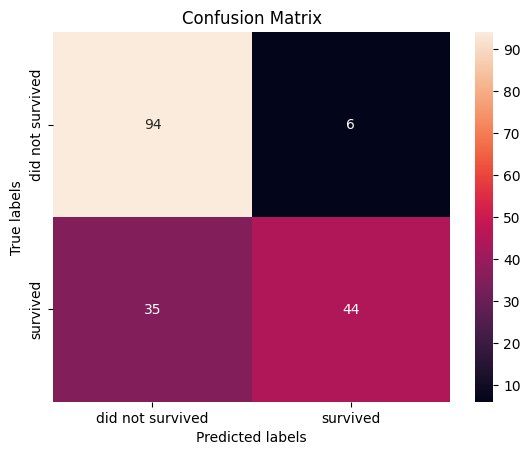

0.770949720670391


In [40]:
yhat=logreg_cv.predict(x_test)
plot_confusion_matrix(y_test,yhat)
accuracy = accuracy_score(y_test, yhat)
print(accuracy)

In [41]:
yhat = logreg_cv.predict(testing_data)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### Decision Tree

In [42]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [43]:
gridsearch_cv_tree = GridSearchCV(tree, parameters, scoring='accuracy', cv=10)
tree_cv = gridsearch_cv_tree.fit(x_train, y_train)

In [44]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
tree_best_score =tree_cv.best_score_
print("accuracy :",tree_best_score)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.8328051643192488


### Decision Tree on Testing Data

In [45]:
tree_score = tree_cv.score(x_test,y_test)
tree_score

0.7597765363128491

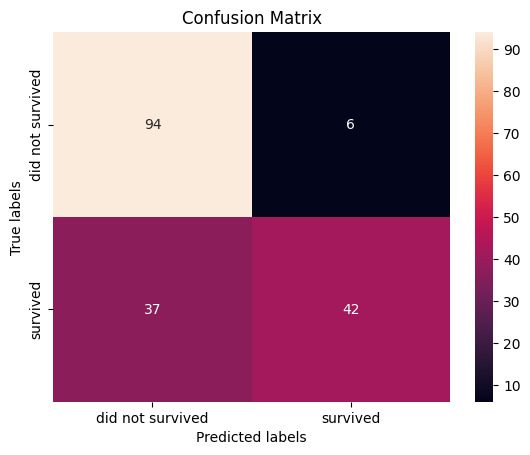

0.7597765363128491


In [46]:
yhat = tree_cv.predict(x_test)
plot_confusion_matrix(y_test,yhat)
accuracy = accuracy_score(y_test, yhat)
print(accuracy)

In [47]:
yhat = tree_cv.predict(testing_data)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### Random Forest

In [79]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

rf_classifier = RandomForestClassifier(random_state=24)

In [80]:
rfc = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5,error_score='raise')
rfc_cv = rfc.fit(x_train, y_train)

In [82]:
print("tuned hpyerparameters :(best parameters) ",rfc.best_params_)
rfc_best_score =rfc_cv.best_score_
print("accuracy :",rfc_best_score)
rfc_score = rfc_cv.score(x_test,y_test)
print(rfc_score)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 100}
accuracy : 0.8327981877277653
0.8044692737430168


0.8044692737430168


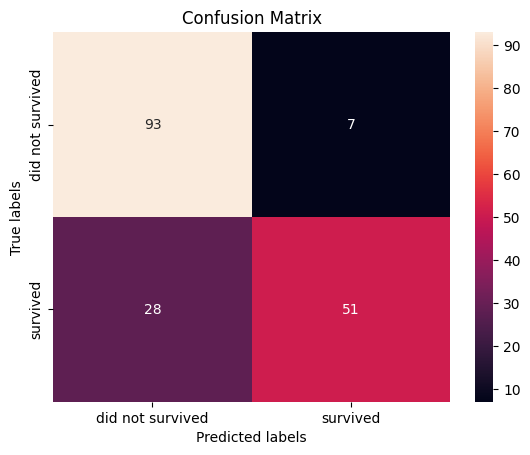

In [86]:
yhat = rfc_cv.predict(x_test)
accuracy = accuracy_score(y_test, yhat)
print(accuracy)
plot_confusion_matrix(y_test,yhat)

In [87]:
yhat = rfc_cv.predict(testing_data)
yhat

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [90]:
algorithms = ['Logistic Regression', 'Random Forest', 'Decision Tree']

scores = [lr_score, rfc_score, tree_score]

best_scores = [ lr_best_score, rfc_best_score, tree_best_score]

column_names = ['Classifiers', 'Accuracy Score', 'Best Score']

df = pd.DataFrame(list(zip(algorithms, scores, best_scores)),columns = column_names)
df

,Classifiers,Accuracy Score,Best Score
0,Logistic Regression,0.770950,0.817312
1,Random Forest,0.804469,0.832798
2,Decision Tree,0.759777,0.832805


In [94]:
test = pd.read_csv('test.csv')
submission = pd.DataFrame(test['PassengerId'])
submission['Survived'] = yhat
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [95]:
submission.to_csv('Submission.csv',index=False)